## Import Mediapipe

First install Microsoft Visual C++ Redistributable latest package (Architecture X64)

* https://learn.microsoft.com/en-us/cpp/windows/latest-supported-vc-redist?view=msvc-170

* To use current working folder as web application:
* Here cwf is 'E:\PYTHONCLASSTF\PrakashSenapati\2024_11_30_Mediapipe'
* open folder and hit below command in address bar:
  * python -m http.server
* A new cmd window will open and let it open till work finished
* You can use current folder images as url like 'http://localhost:8000/laptop_coffee_mug_on_table.jpg'

## Install Libraries

In [5]:
import cv2
import PIL
import urllib
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

## Function to fetch image from a given url

In [6]:
def url_to_array(url):
    req = urllib.request.urlopen(url)
    arr = np.array(bytearray(req.read()), dtype=np.int8)
    arr = cv2.imdecode(arr, -1)
    arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    return arr

In [42]:
# mug = 'https://goodstock.photos/wp-content/uploads/2018/01/Laptop-Coffee-Mug-on-Table.jpg'
mug = 'http://localhost:8000/laptop_coffee_mug_on_table.jpg'
mug = url_to_array(mug)

In [43]:
mug.shape

(1480, 1480, 3)

## Instantiate an Objectron Instance

In [44]:
objectron = mp_objectron.Objectron(
    static_image_mode=True,
    max_num_objects=5,
    min_detection_confidence=0.2,
    model_name='Cup')

In [45]:
type(objectron)

mediapipe.python.solutions.objectron.Objectron

In [46]:
results = objectron.process(mug)

In [47]:
results

mediapipe.python.solution_base.SolutionOutputs

In [48]:
if not results.detected_objects:
    print(f'No box landmarks detected.')

## Detect Object

In [49]:
annotated_image = mug.copy()

In [50]:
annotated_image.shape

(1480, 1480, 3)

In [51]:
for detected_object in results.detected_objects:
    mp_drawing.draw_landmarks(annotated_image,
                              detected_object.landmarks_2d,
                              mp_objectron.BOX_CONNECTIONS)

    mp_drawing.draw_axis(annotated_image,
                         detected_object.rotation,
                         detected_object.translation)

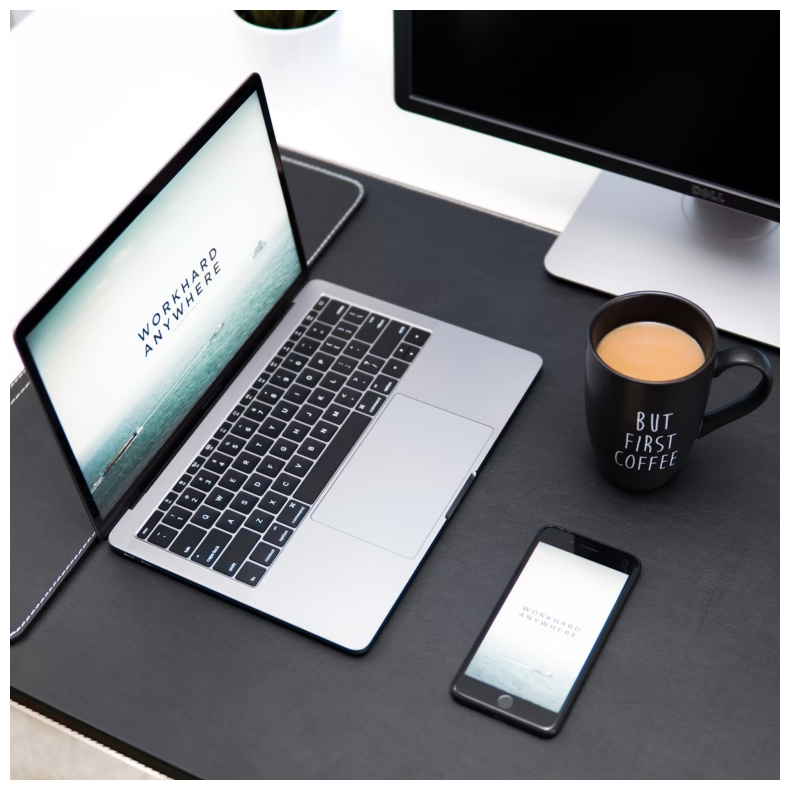

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mug)
ax.axis('off')
plt.show()

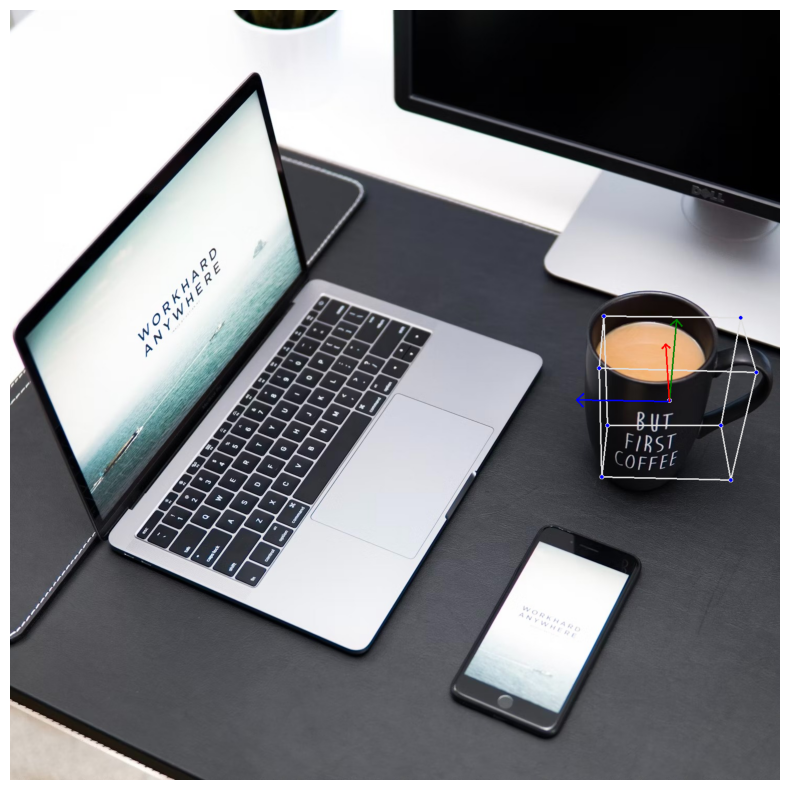

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(annotated_image)
ax.axis('off')
plt.show()